# **KDD- Experiment 3**

*    **SIA VASHIST**
*    PRN: 20190802107

---


# **Dataset -** Advance house price prediction Dataset.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
house_df = pd.read_csv(r'C:\sia\train.csv')

# Print the first few rows to check if the dataset is imported correctly
print(house_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
# Select specific columns
house_dataset = house_df[["Id", "LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF", "SalePrice"]]

# Print the new DataFrame
print(house_dataset)

        Id  LotArea  LotFrontage  1stFlrSF  2ndFlrSF  SalePrice
0        1     8450         65.0       856       854     208500
1        2     9600         80.0      1262         0     181500
2        3    11250         68.0       920       866     223500
3        4     9550         60.0       961       756     140000
4        5    14260         84.0      1145      1053     250000
...    ...      ...          ...       ...       ...        ...
1455  1456     7917         62.0       953       694     175000
1456  1457    13175         85.0      2073         0     210000
1457  1458     9042         66.0      1188      1152     266500
1458  1459     9717         68.0      1078         0     142125
1459  1460     9937         75.0      1256         0     147500

[1460 rows x 6 columns]


In [3]:
# Check for missing values
print(house_dataset.isnull().sum())


Id               0
LotArea          0
LotFrontage    259
1stFlrSF         0
2ndFlrSF         0
SalePrice        0
dtype: int64


In [4]:
# Check the distribution of data
print(house_dataset.describe())

                Id        LotArea  LotFrontage     1stFlrSF     2ndFlrSF  \
count  1460.000000    1460.000000  1201.000000  1460.000000  1460.000000   
mean    730.500000   10516.828082    70.049958  1162.626712   346.992466   
std     421.610009    9981.264932    24.284752   386.587738   436.528436   
min       1.000000    1300.000000    21.000000   334.000000     0.000000   
25%     365.750000    7553.500000    59.000000   882.000000     0.000000   
50%     730.500000    9478.500000    69.000000  1087.000000     0.000000   
75%    1095.250000   11601.500000    80.000000  1391.250000   728.000000   
max    1460.000000  215245.000000   313.000000  4692.000000  2065.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# right skewed distribution fill using median as distribution is right skewed
median_lot_frontage = house_dataset['LotFrontage'].median()
house_dataset['LotFrontage'].fillna(median_lot_frontage, inplace=True)

# check if there are still missing values
total_missing = house_dataset.isnull().any().sum()
print(f"Total Missing are: {total_missing}")


Total Missing are: 0


# Normalization:
> To normalize the data, we can use different scaling techniques such as Min-Max scaling, Z-score, or log scaling. 

> Min-Max scaling scales the data to a range between 0 and 1. 

> Z-score scales the data to have a mean of 0 and a standard deviation of 1. 

> Log scaling transforms the data by taking the logarithm of each element.

In [7]:
# columns in a list
columns = ["Id", "LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF", "SalePrice"]
dataset = house_dataset[columns].copy()

# Min-Max Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

# min-max scaling
scaler = MinMaxScaler()
dataset_minmax = dataset.copy()
dataset_minmax[dataset_minmax.columns] = scaler.fit_transform(dataset_minmax[dataset_minmax.columns])

print(f"Min-max Normalized:\n{dataset_minmax}")


Min-max Normalized:
            Id   LotArea  LotFrontage  1stFlrSF  2ndFlrSF  SalePrice
0     0.000000  0.033420     0.150685  0.119780  0.413559   0.241078
1     0.000685  0.038795     0.202055  0.212942  0.000000   0.203583
2     0.001371  0.046507     0.160959  0.134465  0.419370   0.261908
3     0.002056  0.038561     0.133562  0.143873  0.366102   0.145952
4     0.002742  0.060576     0.215753  0.186095  0.509927   0.298709
...        ...       ...          ...       ...       ...        ...
1455  0.997258  0.030929     0.140411  0.142038  0.336077   0.194556
1456  0.997944  0.055505     0.219178  0.399036  0.000000   0.243161
1457  0.998629  0.036187     0.154110  0.195961  0.557869   0.321622
1458  0.999315  0.039342     0.160959  0.170721  0.000000   0.148903
1459  1.000000  0.040370     0.184932  0.211565  0.000000   0.156367

[1460 rows x 6 columns]


# Z-score Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

# using z-score
scaler = StandardScaler()
dataset_zscore = pd.DataFrame(scaler.fit_transform(dataset.iloc[:, 1:-1]), columns=dataset.columns[1:-1])

print(f"Z-Score Normalised \n {dataset_zscore}")


Z-Score Normalised 
        LotArea  LotFrontage  1stFlrSF  2ndFlrSF
0    -0.207142    -0.220875 -0.793434  1.161852
1    -0.091886     0.460320  0.257140 -0.795163
2     0.073480    -0.084636 -0.627826  1.189351
3    -0.096897    -0.447940 -0.521734  0.937276
4     0.375148     0.641972 -0.045611  1.617877
...        ...          ...       ...       ...
1455 -0.260560    -0.357114 -0.542435  0.795198
1456  0.266407     0.687385  2.355701 -0.795163
1457 -0.147810    -0.175462  0.065656  1.844744
1458 -0.080160    -0.084636 -0.218982 -0.795163
1459 -0.058112     0.233255  0.241615 -0.795163

[1460 rows x 4 columns]


# Log Scaling

In [10]:
# log scaling
import numpy as np

df_log = pd.DataFrame()
for col in list(set(columns)-set(['Id'])):
    df_log[col] = np.log(house_dataset[col])

print("Log scaling normalized:")
print(df_log)

Log scaling normalized:
      2ndFlrSF  1stFlrSF  SalePrice   LotArea  LotFrontage
0     6.749931  6.752270  12.247694  9.041922     4.174387
1         -inf  7.140453  12.109011  9.169518     4.382027
2     6.763885  6.824374  12.317167  9.328123     4.219508
3     6.628041  6.867974  11.849398  9.164296     4.094345
4     6.959399  7.043160  12.429216  9.565214     4.430817
...        ...       ...        ...       ...          ...
1455  6.542472  6.859615  12.072541  8.976768     4.127134
1456      -inf  7.636752  12.254863  9.486076     4.442651
1457  7.049255  7.080026  12.493130  9.109636     4.189655
1458      -inf  6.982863  11.864462  9.181632     4.219508
1459      -inf  7.135687  11.901583  9.204020     4.317488

[1460 rows x 5 columns]


Text(0.5, 1.0, 'Original - SalePrice')

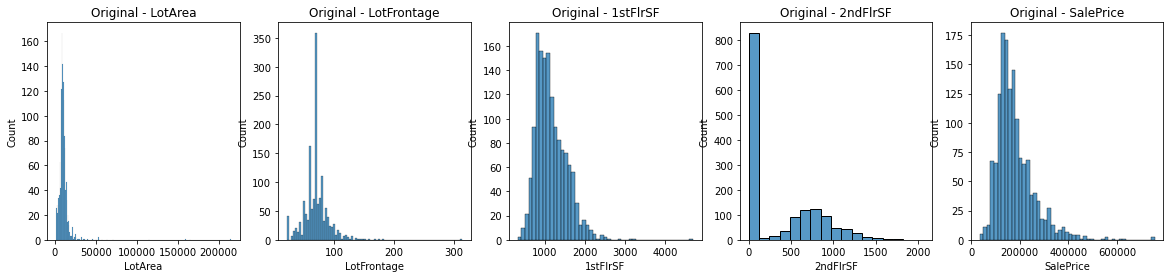

In [11]:
# Plot the original distribution and the normalized distributions using histograms
# Visualize the original and normalized data
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Original data
sns.histplot(house_dataset["LotArea"], ax=axes[0])
axes[0].set_title("Original - LotArea")

sns.histplot(house_dataset["LotFrontage"], ax=axes[1])
axes[1].set_title("Original - LotFrontage")

sns.histplot(house_dataset["1stFlrSF"], ax=axes[2])
axes[2].set_title("Original - 1stFlrSF")

sns.histplot(house_dataset["2ndFlrSF"], ax=axes[3])
axes[3].set_title("Original - 2ndFlrSF")

sns.histplot(dataset["SalePrice"], ax=axes[4])
axes[4].set_title("Original - SalePrice")

# Observation:
> Original data: The histograms of the original data show that the variables have different ranges, with some variables having much larger ranges than others.

Text(0.5, 1.0, 'Min-Max Scaling - SalePrice')

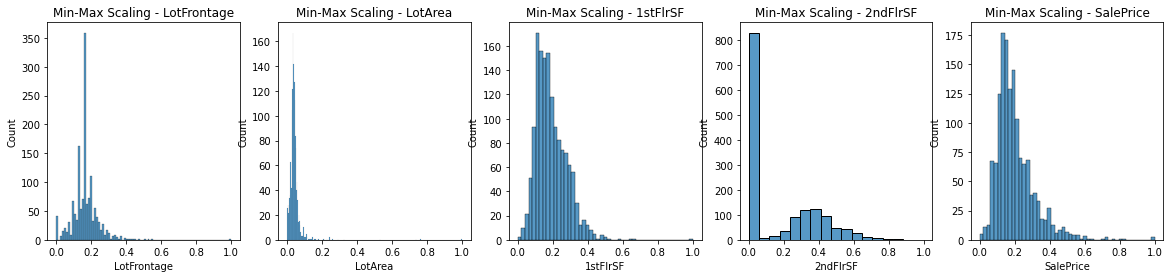

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Min-Max scaling
sns.histplot(dataset_minmax["LotFrontage"], ax=axes[0])
axes[0].set_title("Min-Max Scaling - LotFrontage")

sns.histplot(dataset_minmax["LotArea"], ax=axes[1])
axes[1].set_title("Min-Max Scaling - LotArea")

sns.histplot(dataset_minmax["1stFlrSF"], ax=axes[2])
axes[2].set_title("Min-Max Scaling - 1stFlrSF")

sns.histplot(dataset_minmax["2ndFlrSF"], ax=axes[3])
axes[3].set_title("Min-Max Scaling - 2ndFlrSF")

sns.histplot(dataset_minmax["SalePrice"], ax=axes[4])
axes[4].set_title("Min-Max Scaling - SalePrice")

# Observation:
> Min-Max scaling: After applying Min-Max scaling to the dataset, we can observe that all the variables are now on the same scale, with values between 0 and 1. This type of scaling is useful when the range of values in the variables is very different, as it can bring all variables to a similar scale.

Text(0.5, 1.0, 'Z-Score Normalization - 2ndFlrSF')

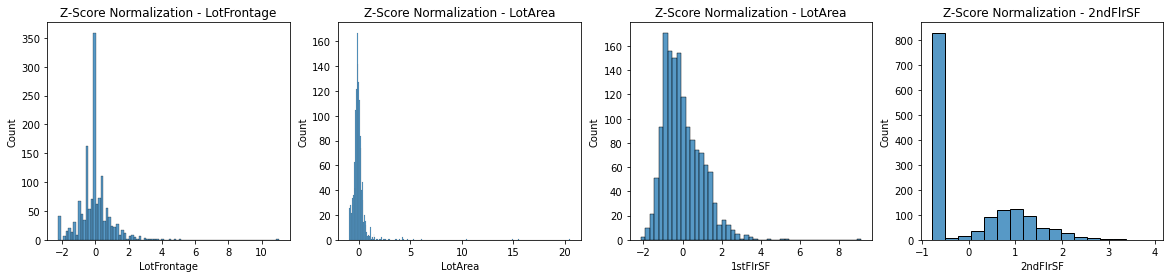

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Z-score normalization
sns.histplot(dataset_zscore["LotFrontage"], ax=axes[0])
axes[0].set_title("Z-Score Normalization - LotFrontage")

sns.histplot(dataset_zscore["LotArea"], ax=axes[1])
axes[1].set_title("Z-Score Normalization - LotArea")

sns.histplot(dataset_zscore["1stFlrSF"], ax=axes[2])
axes[2].set_title("Z-Score Normalization - LotArea")
                     
sns.histplot(dataset_zscore["2ndFlrSF"], ax=axes[3])
axes[3].set_title("Z-Score Normalization - 2ndFlrSF")

# Observation: 
> Z-score scaling: The histograms of the dataset after applying z-score normalization show that the variables are now centered around 0, with a standard deviation of 1. This type of scaling is useful when we want to compare the distribution of variables with different means and standard deviations.

Text(0.5, 1.0, 'Log Scaling - LotArea')

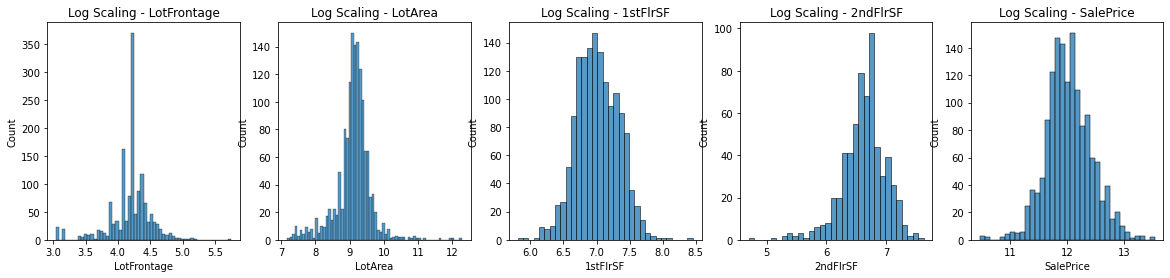

In [14]:
# Log Scaling normalization
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

sns.histplot(df_log["LotFrontage"], ax=axes[0])
axes[0].set_title("Log Scaling - LotFrontage")

sns.histplot(df_log["1stFlrSF"], ax=axes[2])
axes[2].set_title("Log Scaling - 1stFlrSF")

sns.histplot(df_log["SalePrice"], ax=axes[4])
axes[4].set_title("Log Scaling - SalePrice")
                     
sns.histplot(df_log["2ndFlrSF"], ax=axes[3])
axes[3].set_title("Log Scaling - 2ndFlrSF")

sns.histplot(df_log["LotArea"], ax=axes[1])
axes[1].set_title("Log Scaling - LotArea")

# Observation:
>Log scaling: The histograms of the dataset after applying log scaling show that the variables have a more normal distribution. Log scaling is often useful when the data has a skewed distribution and we want to normalize it.

# Conclusion:

> In this code, we have performed preprocessing and scaling techniques on the Advanced House Price Prediction Dataset. The missing values were handled.

> We applied three different scaling techniques - Min-Max scaling, Z-score scaling, and Log scaling - to normalize the data. We also applied standardization to the data to standardize the data to have a mean of 0 and standard deviation of 1.

> The output of each of the scaling techniques was plotted using histograms to visualize the distribution of the data. From the histograms, we can observe that the distribution of the data is different for each scaling technique.